# Common birthday problem

How large a group of a group of people should be such that there is at least 50% chance that at least two people are born on the same day of year?

In [3]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Suppose there are 365 days in the year, and find the probability of complementary event $A_n$: there's no coincidences of birthdays in the group of $n$ people. So the problem reformulates as follows: what is the minimum group size $n$ such that $P(A_n)\leq0.5$. For $n=1$ we have $P(A_1)=1$. If we add a member to the group, for the event $A_2$ to occur the birthday of the new member whould fall in one of 364 remaining days, so the probability $P(A_2)=1\times \frac{364}{365}=1\times\left(1-\frac1{365}\right)$. Adding a third member to the group provides $P(A_3)=1\times\left(1-\frac1{365}\right)\times\left(1-\frac2{365}\right)$. Continuing up to $n$ members we get $$ P(A_n)=1\times\left(1-\frac1{365}\right)\cdots\times\left(1-\frac{n-1}{365}\right)=\prod_{k=0}^{n-1}\left(1-\frac{k}{365}\right) =  \left(\prod_{k=0}^{n-1}\frac{365-k}{365}\right). $$ Let's make calculations.

### Start with an array
$365-k$

In [15]:
ndays = 365
k = pd.Series(range(ndays, 0, -1), index=range(1,ndays+1))
print(k.head())

1    365
2    364
3    363
4    362
5    361
dtype: int64


### Normalize

Divide $365 - k$ by the number of days in a year: $\frac{365-k}{365}$

In [16]:
k = k / ndays
print(k.head())

1    1.000000
2    0.997260
3    0.994521
4    0.991781
5    0.989041
dtype: float64


## compute cumulative product
$$ \prod_{k=0}^{n-1}\left(\frac{365-k}{365}\right) $$

In [18]:
cum_k = k.cumprod()
print(cum_k.head())

1    1.000000
2    0.997260
3    0.991796
4    0.983644
5    0.972864
dtype: float64


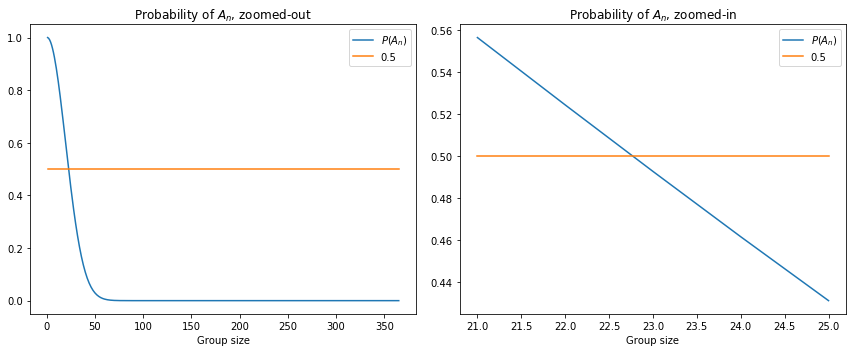

In [24]:
one_half = pd.Series(0.5, index=xc.index)

figsize(15,5)
subplot(1,2,1)
xc.plot(label='$P(A_n)$')
one_half.plot(label='0.5')
title('Probability of $A_n$, zoomed-out')
xlabel('Group size')
legend()

subplot(1,2,2)
n_min = 20; n_max = 25
xc[n_min:n_max].plot(label='$P(A_n)$')
one_half[n_min:n_max].plot(label='0.5')
title('Probability of $A_n$, zoomed-in')
xlabel('Group size')
legend()
tight_layout()

Group size 23 is the minimum group size for which probability of $A_n$ is less than 0.5, or (equivalently by looking at the complemnt event) the probability of two or more people born on the same day is greater that 0.5.

In [26]:
# Confirm the visual evidence
print(cum_k[22], cum_k[23])

0.5243046923374497 0.4927027656760144
